In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graph_tool.all as gt

In [23]:
# Read the data from the disease_signature file in the data folder
diseaseSignatures = pd.read_table('./data/Disease_Signatures_MECFS.tsv',sep='\t')
snpTable = pd.read_table('./data/SNP_table_MECFS.tsv',sep='\t')

# Display the dataframe
# print(signatures)
# print(snpTable)


In [ ]:
def split_string_by_comma(string):
    return string.split(',')


In [44]:
diseaseSignatureKeys = diseaseSignatures.keys()
snpTableKeys = snpTable.keys()
snps = snpTable[snpTableKeys[0]]
sigs = diseaseSignatures[diseaseSignatureKeys[0]]
sigSnps = diseaseSignatures[diseaseSignatureKeys[1]]
sigGenes = diseaseSignatures[diseaseSignatureKeys[2]]
sigToSnps = {}
sigToGenes = {}
for i in range(len(sigs)):
    sigToSnps[sigs[i]] = sigSnps[i].split(',')
    sigToGenes[sigs[i]] = sigGenes[i].split(',')
genes = set()
for genes_list in sigToGenes.values():
    genes.update(genes_list)

In [45]:
adjacencyMatrixSigToSnp = np.zeros((len(sigs), len(snps)))
for i in range(len(sigs)):
    for j in range(len(snps)):
        if snps[j] in sigToSnps[sigs[i]]:
            adjacencyMatrixSigToSnp[i][j] = 1

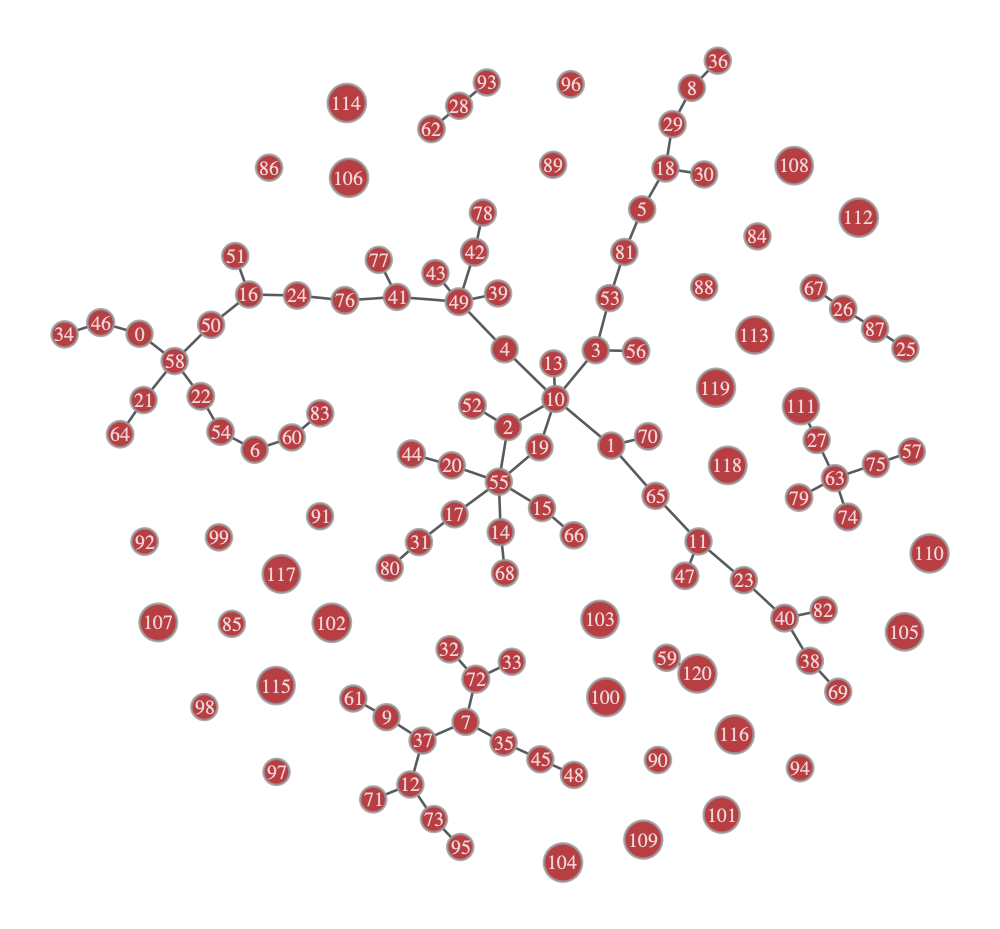

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x1af55ead0, at 0x1a2b7b890>

In [48]:
import graph_tool.all as gt

# Create a graph from the adjacency matrix
g = gt.Graph(directed=False)
g.add_vertex(len(sigs))
for i in range(len(sigs)):
    for j in range(len(snps)):
        if adjacencyMatrixSigToSnp[i][j] == 1:
            g.add_edge(i, j)

# Plot the graph
pos = gt.sfdp_layout(g)
gt.graph_draw(g, pos=pos, vertex_text=g.vertex_index, vertex_font_size=10, output_size=(500, 500))
